# Loss fucntions

## Linear classifiers: the coefficients

In [2]:
import numpy as np

# Dot Product
x=np.arange(3)
y=np.arange(3,6)
dot_prod = np.sum(x*y)
dot_prod

14

In [3]:
# Dot Product
x@y

14

`x@y` is called the dot product of `x` and `y`,and is written _x.y_

### Linear classifier prediction
- raw model output = coefficients.features + intercept
- Linear classifier prediction: compute raw model output, check the **sign**
    - if positive, predict one class
    - if negative, predict the other class
- This is the same for logistic regression anf linear SVM

## What is a loss function?

In [4]:
from scipy.optimize import minimize

# minimize the function y=x^2, which is computed using np.square
# The second argument is our initial guess, 0.
# Finally, ".x" at the end to grab the input value that makes the function as small as possible
minimize(np.square, 0).x

array([0.])

**Note:** We got zero as a result because this function is minimized when x=0. 

In [5]:
# let's try another initial guess to see 
minimize(np.square, 2).x

array([-1.88846401e-08])

**Note:** We see very small number, near 10 to the power of -8. This is normal for numerical optimization: wew don't expect exactly the right answer, but something very close.

## Loss function diagram

### 0-1 loss diagram 
![image-2](image-2.png)

By the definition of 0-1 loss, incorrect predictions, or mistakes, get a penalty of 1 and correct predictions get no penalty.

### Linear regression loss diagram 
![image-3](image-3.png)

- In linear regression, the raw model output is the prediction. So, the loss is higher as the prediction is further away from true target value, which we're assuming is 1 in this case. 

- But for linear classifier, being really close to the true value doesn't matter, as long as we get the sign right. The left arm of the curve is OK: the loss is large for wrong answers. But the righgt arm is problematic: if the raw model output is large and positive, the loss grows large even though we're correctly predicting +1.

### Logistic loss diagram
![image-4](image-4.png)

As we move to the right, towards the zone of correct predictions, the loss goes down.

### Hinge loss diagram
![image-5](image-5.png)

This is the hinge loss, used in SVMs. The general shape is the same as the logistic loss: both penalize incorrect predictions. 

![image-6](image-6.png)


### Comparing the logistic and hinge losses

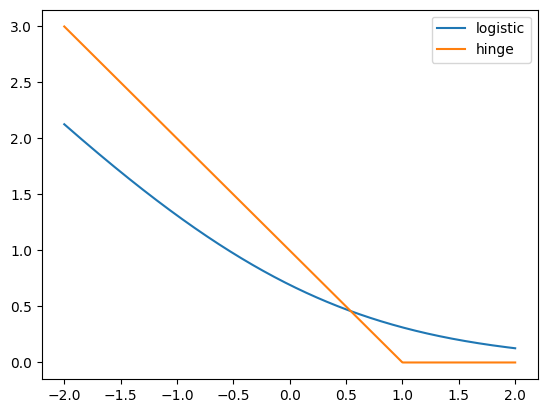

In [7]:
import matplotlib.pyplot as plt

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()